In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Lớp Bound Angle Pose có 1979 ảnh.
Lớp Chair Pose có 2082 ảnh.
Lớp Dancer Pose có 2340 ảnh.
Lớp Downward_dog có 1824 ảnh.
Lớp Half Moon Pose có 1917 ảnh.
Lớp Tree Pose có 1773 ảnh.
Lớp Triangle có 2133 ảnh.
Lớp Warrior Pose có 2583 ảnh.


C:\Users\PC\AppData\Local\Temp\ipykernel_276\3067864924.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_names, y=class_counts, palette='viridis')


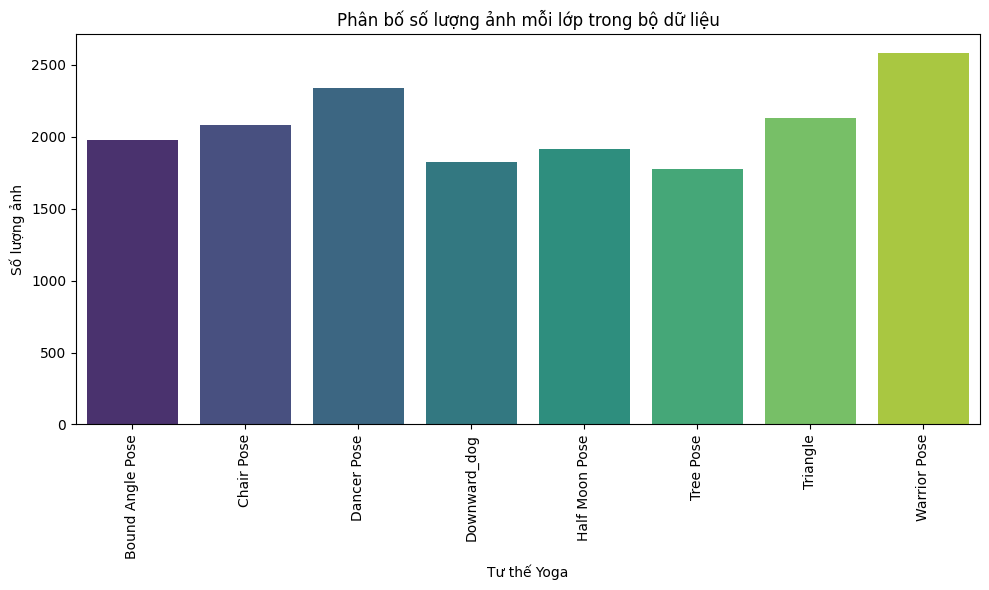

In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Đường dẫn tới thư mục chứa bộ dữ liệu
dataset_dir = 'D:\\yoga1\\train'

# Lấy danh sách các thư mục con (từng lớp tư thế yoga)
class_names = os.listdir(dataset_dir)

# Tạo một danh sách lưu trữ số lượng ảnh của mỗi lớp
class_counts = []

# Duyệt qua từng thư mục và đếm số lượng ảnh trong mỗi thư mục
for class_name in class_names:
    class_path = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_path):  # Kiểm tra xem đây có phải là thư mục (lớp) không
        image_count = len([f for f in os.listdir(class_path) if f.endswith(('.jpg', '.png'))])  # Đếm ảnh .jpg và .png
        class_counts.append(image_count)
        print(f"Lớp {class_name} có {image_count} ảnh.")  # In số lượng ảnh của từng lớp

# Vẽ biểu đồ phân bố số lượng ảnh mỗi lớp
plt.figure(figsize=(10, 6))
sns.barplot(x=class_names, y=class_counts, palette='viridis')
plt.xticks(rotation=90)  # Xoay tên các lớp cho dễ đọc
plt.xlabel('Tư thế Yoga')
plt.ylabel('Số lượng ảnh')
plt.title('Phân bố số lượng ảnh mỗi lớp trong bộ dữ liệu')
plt.tight_layout()
plt.show()


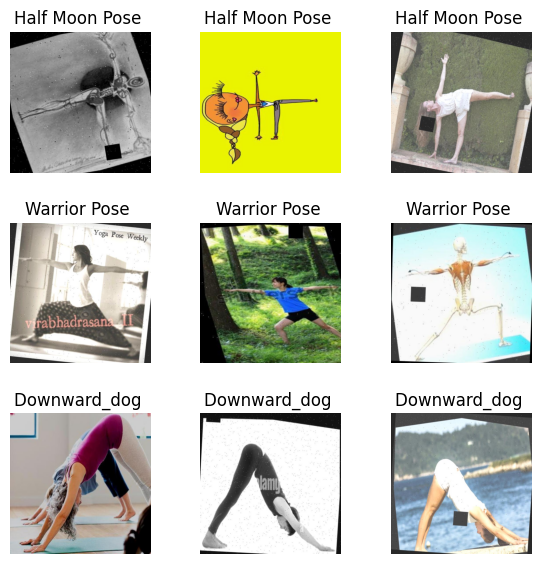

In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Đường dẫn tới thư mục chứa bộ dữ liệu
dataset_dir = 'D:\\yoga1\\train'

# Lấy danh sách các thư mục con (từng lớp tư thế yoga)
class_names = os.listdir(dataset_dir)

# Lựa chọn ngẫu nhiên 3 lớp để hiển thị ảnh mẫu
selected_classes = random.sample(class_names, 3)

# Tạo một hình 3x3 để hiển thị ảnh mẫu (Giảm kích thước hình để không bị quá lớn)
fig, axes = plt.subplots(3, 3, figsize=(6,6))  # Điều chỉnh kích thước cho phù hợp

# Duyệt qua từng lớp đã chọn và hiển thị 3 ảnh mẫu từ mỗi lớp
for i, class_name in enumerate(selected_classes):
    class_path = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_path):  # Kiểm tra nếu là thư mục (lớp)
        # Lấy danh sách các ảnh trong lớp
        images = [f for f in os.listdir(class_path) if f.endswith(('.jpg', '.png'))]
        
        # Lựa chọn 3 ảnh ngẫu nhiên trong lớp
        selected_images = random.sample(images, 3)
        
        # Hiển thị 3 ảnh mẫu cho lớp này
        for j, image_name in enumerate(selected_images):
            img_path = os.path.join(class_path, image_name)
            img = mpimg.imread(img_path)
            ax = axes[i, j]  # Chọn vị trí trong lưới 3x3
            ax.imshow(img)
            ax.axis('off')  # Tắt hiển thị trục
            ax.set_title(f'{class_name} ')

# Tinh chỉnh layout để không bị chồng lên nhau
plt.tight_layout(pad=2.0)  # Thêm khoảng cách giữa các ảnh
plt.show()



In [ ]:
    train_datagen = ImageDataGenerator(
        rescale=1./255,                         
    )



training_set = train_datagen.flow_from_directory(
    'D:\\yogapose.v3i.folder\\train',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical',
)

test_datagen = ImageDataGenerator(
    rescale = 1./255,
)

testing_set = test_datagen.flow_from_directory(
    'D:\\yogapose.v3i.folder\\valid',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical',
)


Found 16631 images belonging to 8 classes.
Found 1241 images belonging to 8 classes.


In [10]:
print(training_set.class_indices)

images, labels = next(training_set)
print(labels)  


{'Bound Angle Pose': 0, 'Chair Pose': 1, 'Dancer Pose': 2, 'Downward_dog': 3, 'Half Moon Pose': 4, 'Tree Pose': 5, 'Triangle': 6, 'Warrior Pose': 7}
[[0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 

In [26]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.optimizers import Adam

# Load pre-trained MobileNetV2 model without the top (fully connected layers)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base layers
base_model.trainable = False

# Build the custom top layers on top of MobileNetV2
model = Sequential()

# Add the MobileNetV2 base model
model.add(base_model)

# Add custom layers for classification
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_initializer=HeNormal()))
model.add(Dense(256, activation='relu', kernel_initializer=HeNormal()))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

# Model summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 62720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │    32,113,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,504,520 (131.62 MB)

 Trainable params: 32,246,536 (123.01 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [27]:
from tensorflow.keras.optimizers import Adam

learning_rate = 0.00001

optimizer = Adam(learning_rate=learning_rate)

# Biên dịch mô hình với optimizer đã điều chỉnh
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [28]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Tự động giảm LR khi val_loss không cải thiện trong 5 epoch, giảm còn 50%
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=20, verbose=1, min_lr=1e-6)


In [14]:
history=model.fit(training_set,epochs=10,validation_data=testing_set,callbacks=[reduce_lr])

C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
520/520 ━━━━━━━━━━━━━━━━━━━━ 560s 1s/step - accuracy: 0.7061 - loss: 1.0575 - val_accuracy: 0.9863 - val_loss: 0.0457 - learning_rate: 1.0000e-04
Epoch 2/10
520/520 ━━━━━━━━━━━━━━━━━━━━ 326s 626ms/step - accuracy: 0.9665 - loss: 0.1009 - val_accuracy: 0.9968 - val_loss: 0.0220 - learning_rate: 1.0000e-04
Epoch 3/10
520/520 ━━━━━━━━━━━━━━━━━━━━ 326s 627ms/step - accuracy: 0.9763 - loss: 0.0680 - val_accuracy: 0.9911 - val_loss: 0.0213 - learning_rate: 1.0000e-04
Epoch 4/10
520/520 ━━━━━━━━━━━━━━━━━━━━ 326s 628ms/step - accuracy: 0.9862 - loss: 0.0400 - val_accuracy: 0.9879 - val_loss: 0.0354 - learning_rate: 1.0000e-04
Epoch 5/10
520/520 ━━━━━━━━━━━━━━━━━━━━ 327s 629ms/step - accuracy: 0.9876 - loss: 0.0373 - val_accuracy: 0.9968 - val_loss: 0.0157 - learning_rate: 1.0000e-04
Epoch 6/10
520/520 ━━━━━━━━━━━━━━━━━━━━ 327s 629ms/step - accuracy: 0.9887 - loss: 0.0375 - val_accuracy: 0.9927 - val_loss: 0.0285 - learning_rate: 1.0000e-04
Epoch 7/10
520/520 ━━━━━━━━━━━━━━━━━━━━ 327

In [22]:
history=model.fit(training_set,epochs=10,validation_data=testing_set,callbacks=[reduce_lr])

Epoch 1/10
520/520 ━━━━━━━━━━━━━━━━━━━━ 334s 635ms/step - accuracy: 0.5956 - loss: 4.2451 - val_accuracy: 0.9581 - val_loss: 0.1159 - learning_rate: 0.0010
Epoch 2/10
520/520 ━━━━━━━━━━━━━━━━━━━━ 328s 631ms/step - accuracy: 0.9009 - loss: 0.3233 - val_accuracy: 0.9799 - val_loss: 0.0550 - learning_rate: 0.0010
Epoch 3/10
520/520 ━━━━━━━━━━━━━━━━━━━━ 327s 629ms/step - accuracy: 0.9452 - loss: 0.1937 - val_accuracy: 0.9895 - val_loss: 0.0414 - learning_rate: 0.0010
Epoch 4/10
520/520 ━━━━━━━━━━━━━━━━━━━━ 327s 628ms/step - accuracy: 0.9694 - loss: 0.1146 - val_accuracy: 0.9823 - val_loss: 0.0662 - learning_rate: 0.0010
Epoch 5/10
520/520 ━━━━━━━━━━━━━━━━━━━━ 328s 630ms/step - accuracy: 0.9657 - loss: 0.1501 - val_accuracy: 0.9952 - val_loss: 0.0148 - learning_rate: 0.0010
Epoch 6/10
520/520 ━━━━━━━━━━━━━━━━━━━━ 330s 634ms/step - accuracy: 0.9720 - loss: 0.1470 - val_accuracy: 0.9823 - val_loss: 0.1236 - learning_rate: 0.0010
Epoch 7/10
520/520 ━━━━━━━━━━━━━━━━━━━━ 329s 632ms/step - accura

In [29]:
history=model.fit(training_set,epochs=10,validation_data=testing_set,callbacks=[reduce_lr])

Epoch 1/10
520/520 ━━━━━━━━━━━━━━━━━━━━ 335s 636ms/step - accuracy: 0.5221 - loss: 1.5044 - val_accuracy: 0.9702 - val_loss: 0.1262 - learning_rate: 1.0000e-05
Epoch 2/10
520/520 ━━━━━━━━━━━━━━━━━━━━ 325s 625ms/step - accuracy: 0.9339 - loss: 0.2094 - val_accuracy: 0.9919 - val_loss: 0.0367 - learning_rate: 1.0000e-05
Epoch 3/10
520/520 ━━━━━━━━━━━━━━━━━━━━ 326s 627ms/step - accuracy: 0.9787 - loss: 0.0736 - val_accuracy: 0.9960 - val_loss: 0.0164 - learning_rate: 1.0000e-05
Epoch 4/10
520/520 ━━━━━━━━━━━━━━━━━━━━ 330s 634ms/step - accuracy: 0.9877 - loss: 0.0445 - val_accuracy: 0.9976 - val_loss: 0.0104 - learning_rate: 1.0000e-05
Epoch 5/10
520/520 ━━━━━━━━━━━━━━━━━━━━ 329s 633ms/step - accuracy: 0.9924 - loss: 0.0278 - val_accuracy: 0.9984 - val_loss: 0.0066 - learning_rate: 1.0000e-05
Epoch 6/10
520/520 ━━━━━━━━━━━━━━━━━━━━ 329s 633ms/step - accuracy: 0.9932 - loss: 0.0235 - val_accuracy: 0.9984 - val_loss: 0.0068 - learning_rate: 1.0000e-05
Epoch 7/10
520/520 ━━━━━━━━━━━━━━━━━━━━ 

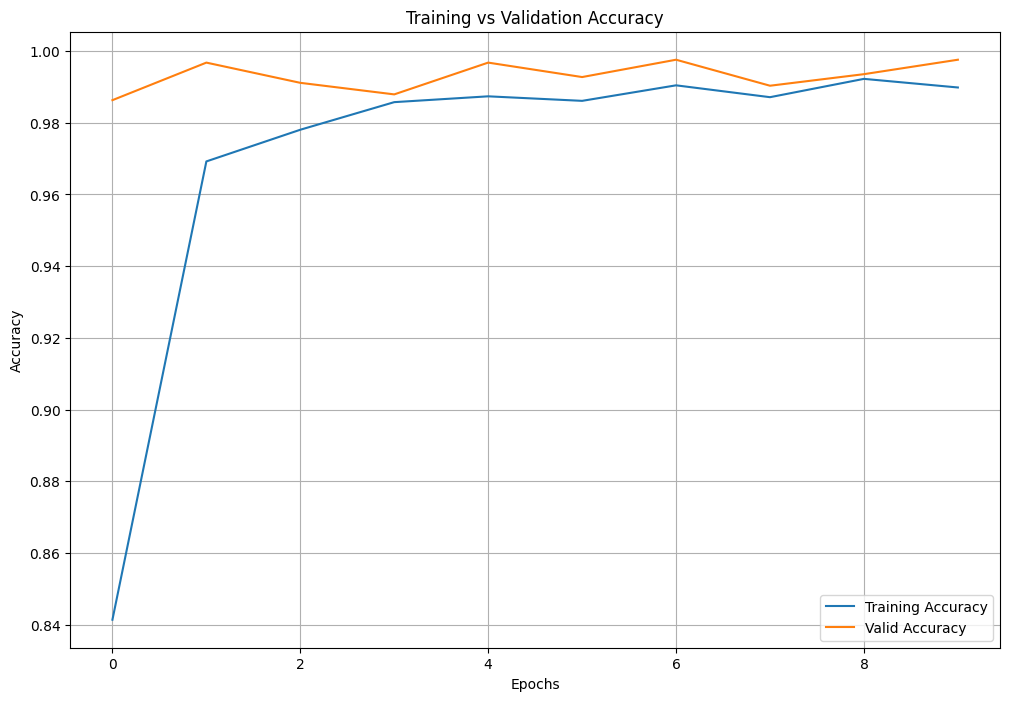

In [15]:
plt.figure(figsize=(12, 8))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Valid Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


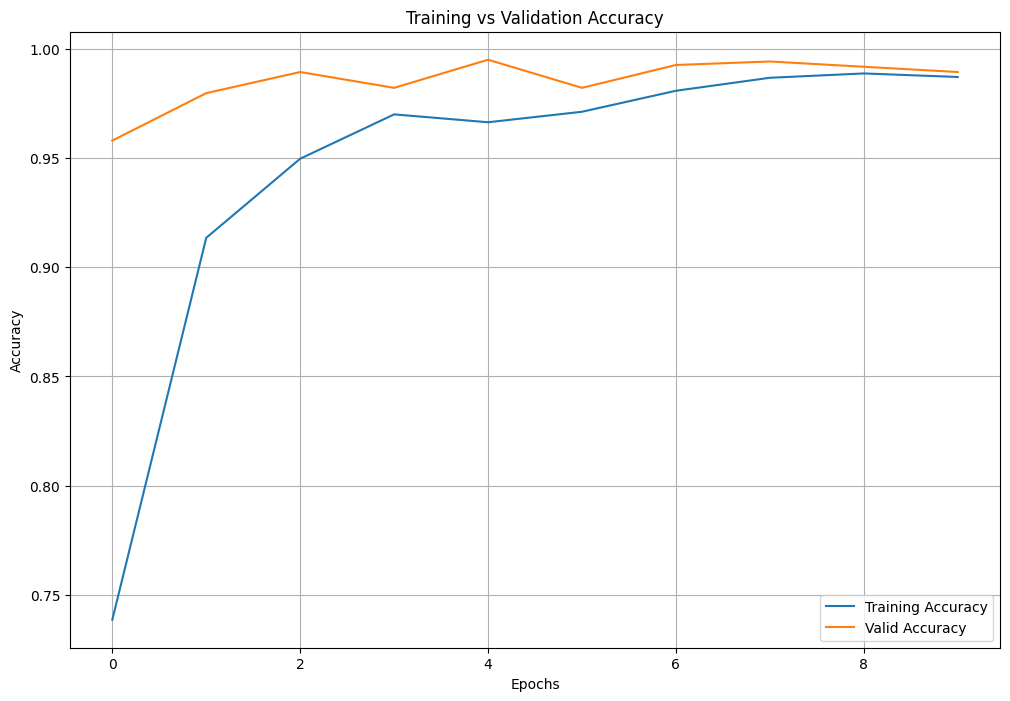

In [23]:
plt.figure(figsize=(12, 8))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Valid Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


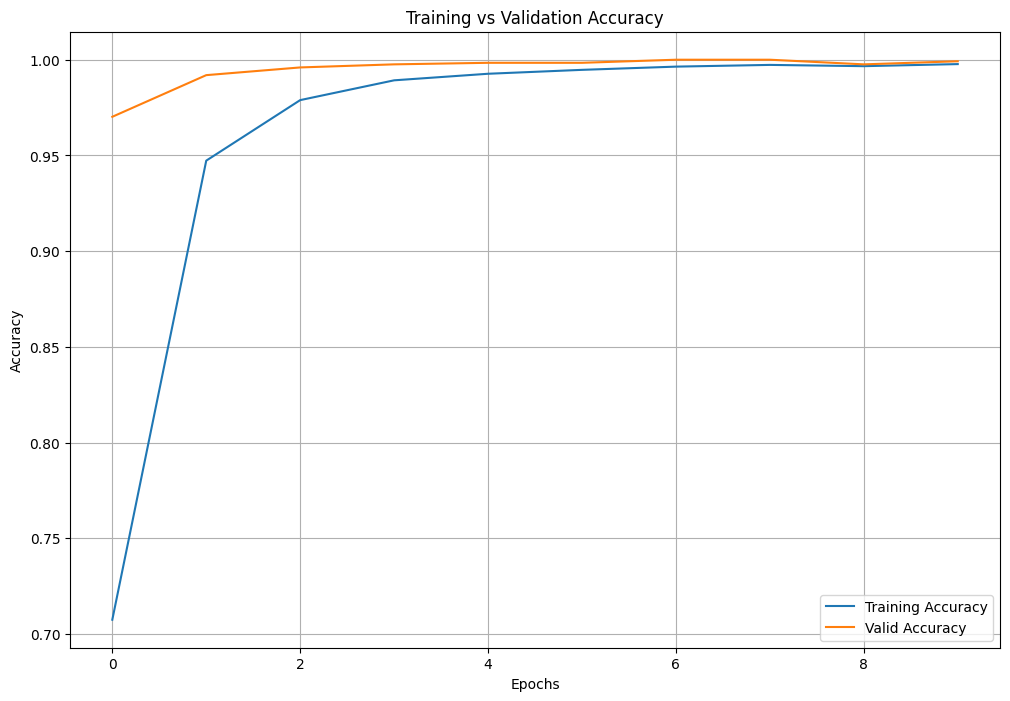

In [30]:
plt.figure(figsize=(12, 8))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Valid Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
model.save('D:\\yoga1\\yoga-model2.h5')

In [6]:
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np

model = load_model('D:\\yoga1\\yoga-model2.h5')  

class_labels = {
    'Bound Angle Pose': 0, 'Chair Pose': 1, 'Dancer Pose': 2, 'Downward_dog': 3, 'Half Moon Pose': 4, 'Tree Pose': 5, 'Triangle': 6, 'Warrior Pose': 7
}

# Đọc hình ảnh
test_image = Image.open('D:\\yoga1\\test\\baddhakonasana\\image_2_jpg.rf.e1ed67871f63c947041d66dcfe95aff9.jpg')

# Đảm bảo ảnh có chế độ RGB
test_image = test_image.convert("RGB")

# Thay đổi kích thước ảnh về 224x224
test_image = test_image.resize((224, 224))

# Chuyển ảnh thành mảng numpy
test_image_arr = np.array(test_image)

# Kiểm tra kích thước ảnh và đảm bảo có 3 kênh màu (RGB)
if test_image_arr.shape == (224, 224, 3):
    # Reshape ảnh cho mô hình
    test_inp = test_image_arr.reshape((1, 224, 224, 3))  
    test_inp = test_inp.astype('float32')  
    test_inp /= 255.0  # Chuẩn hóa ảnh
    
    # Dự đoán lớp của ảnh
    prediction = model.predict(test_inp)

    # Lấy lớp dự đoán
    predicted_class = np.argmax(prediction, axis=1)

    # Tìm tên lớp từ class_labels
    predicted_class_name = [key for key, value in class_labels.items() if value == predicted_class]

    print(f"Predicted Class (Index): {predicted_class}")
    print(f"Predicted Class (Name): {predicted_class_name[0]}")
else:
    print("Image does not have the required 3 color channels (RGB).")


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted Class (Index): [0]
Predicted Class (Name): Bound Angle Pose


In [37]:
import cv2
from ultralytics import YOLO
import cvzone
import tensorflow as tf
import numpy as np
from IPython.display import display, clear_output
import time

# Các tư thế yoga
yoga_poses = [
    "Bound Angle Pose", "Chair Pose", "Dancer Pose", "Downward_dog", "Half Moon Pose", "Tree Pose", "Triangle", "Warrior Pose"
]

# Các lớp đối tượng YOLO
classNames = [
    "person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", "boat", "traffic light", "fire hydrant", "stop sign", 
    "parking meter", "bench", "bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella", 
    "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat", "baseball glove", "skateboard", 
    "surfboard", "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", 
    "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", "chair", "sofa", "pottedplant", "bed", "diningtable", "toilet", "tvmonitor", 
    "laptop", "mouse", "remote", "keyboard", "mobile phone", "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", 
    "scissors", "teddy bear", "hair drier", "toothbrush"
]

# Load model
yoga_model = tf.keras.models.load_model('D:\\yogapose.v3i.folder\\yoga-model1.h5')
yolo_model = YOLO('yolov8n.pt')

# Hàm xử lý ảnh
def imgProcess(image):
    img = cv2.resize(image, (224, 224))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    prediction = yoga_model.predict(img)
    predicted_class_index = np.argmax(prediction)
    return predicted_class_index

# Nhận diện từ video
def run_yoga_detection(video_path):
    cap = cv2.VideoCapture(video_path)
    cap.set(3, 1280)
    cap.set(4, 720)

    while True:
        success, img = cap.read()
        if not success:
            break

        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        results = yolo_model(img_rgb, stream=True)

        for r in results:
            for box in r.boxes:
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                class_id = int(box.cls[0])
                conf = float(box.conf[0])

                if classNames[class_id] == 'person':
                    cropped_img = img[y1:y2, x1:x2]
                    if cropped_img.size == 0:
                        continue
                    pose_index = imgProcess(cropped_img)
                    pose_name = yoga_poses[pose_index]
                    cvzone.putTextRect(img, pose_name, (x1, y1), scale=1, thickness=1, colorT=(255, 255, 255), colorR=(0, 100, 255), font=cv2.FONT_HERSHEY_SIMPLEX)
                    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Hiển thị khung hình
        cv2.imshow("Yoga Pose Detection", img)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

# Chạy thử
run_yoga_detection('D:\\yogapose.v3i.folder\\video\Dancer Pose\\dancerpose1.mp4')


<>:76: SyntaxWarning: invalid escape sequence '\D'
<>:76: SyntaxWarning: invalid escape sequence '\D'
C:\Users\PC\AppData\Local\Temp\ipykernel_23348\2757871678.py:76: SyntaxWarning: invalid escape sequence '\D'
  run_yoga_detection('D:\\yogapose.v3i.folder\\video\Dancer Pose\\dancerpose1.mp4')



0: 320x640 1 person, 39.4ms
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 950ms/step
Speed: 1.8ms preprocess, 39.4ms inference, 0.9ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 1 person, 42.0ms
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Speed: 1.7ms preprocess, 42.0ms inference, 0.8ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 1 person, 39.7ms
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Speed: 1.8ms preprocess, 39.7ms inference, 0.8ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 1 person, 36.9ms
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Speed: 1.8ms preprocess, 36.9ms inference, 0.8ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 1 person, 38.8ms
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Speed: 1.4ms preprocess, 38.8ms inference, 0.8ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 1 person, 36.9ms
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Speed: 1.9ms preprocess, 36.9ms inference, 0.7ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 1 p